In [1]:
import pandas as pd
import numpy as np

In [17]:
pd.read_csv('./data_info.csv')

,변수명,변수 설명
0,id,아이디
1,base_date,날짜
2,day_of_week,요일
3,base_hour,시간대
4,road_in_use,도로사용여부
5,lane_count,차로수
6,road_rating,도로등급
7,multi_linked,중용구간 여부
8,connect_code,연결로 코드
9,maximum_speed_limit,최고속도제한


In [3]:
train = pd.read_parquet('./train.parquet')
test = pd.read_parquet('./test.parquet')
#train

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701217 entries, 0 to 4701216
Data columns (total 24 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   id                     object 
 1   base_date              int64  
 2   day_of_week            object 
 3   base_hour              int64  
 4   road_in_use            int64  
 5   lane_count             int64  
 6   road_rating            int64  
 7   road_name              object 
 8   multi_linked           int64  
 9   connect_code           int64  
 10  maximum_speed_limit    float64
 11  vehicle_restricted     float64
 12  weight_restricted      float64
 13  height_restricted      float64
 14  road_type              int64  
 15  start_node_name        object 
 16  start_latitude         float64
 17  start_longitude        float64
 18  start_turn_restricted  object 
 19  end_node_name          object 
 20  end_latitude           float64
 21  end_longitude          float64
 22  end_turn_restricte

array([[<AxesSubplot:title={'center':'target'}>]], dtype=object)

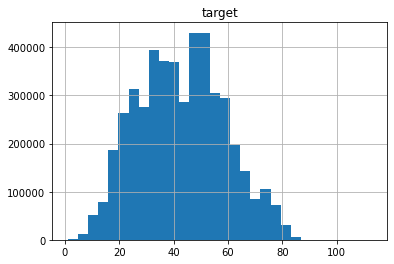

In [5]:
train.hist('target',bins=30)

In [ ]:
import sklearn

In [6]:
from sklearn.preprocessing import LabelEncoder
str_col = ['day_of_week','start_turn_restricted','end_turn_restricted','vehicle_restricted']
for i in str_col:
    le = LabelEncoder()
    le=le.fit(train[i])
    train[i]=le.transform(train[i])
    
    for label in np.unique(test[i]):
        if label not in le.classes_: 
            le.classes_ = np.append(le.classes_, label)
    test[i]=le.transform(test[i])

In [7]:
y_train = train['target'] 

X_train = train.drop(['id','base_date', 'target','road_name', 'start_node_name', 'end_node_name'], axis=1)

test = test.drop(['id','base_date', 'road_name', 'start_node_name', 'end_node_name'], axis=1)

print(X_train.shape)
print(y_train.shape)
print(test.shape)

(4701217, 18)
(4701217,)
(291241, 18)


In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=1, include_bias=False)
X_poly = poly_features.fit_transform(X_train)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_train)

LinearRegression()

In [24]:
X_train.columns

Index(['day_of_week', 'base_hour', 'road_in_use', 'lane_count', 'road_rating',
       'multi_linked', 'connect_code', 'maximum_speed_limit',
       'vehicle_restricted', 'weight_restricted', 'height_restricted',
       'road_type', 'start_latitude', 'start_longitude',
       'start_turn_restricted', 'end_latitude', 'end_longitude',
       'end_turn_restricted'],
      dtype='object')

In [25]:
model.coef_

array([ 5.24867735e-02, -3.49808391e-01,  1.67331308e+01, -6.11506826e+00,
       -8.83901390e-01, -3.97607601e-02,  1.28338446e-01,  6.41254480e-01,
       -6.66133815e-15,  2.26229162e-04, -8.88178420e-16, -3.54511895e-01,
        1.26204400e+01, -7.95443503e+00, -3.90452959e+00, -1.13402662e+01,
        6.98608142e+00, -4.88287575e+00])

In [10]:
test_poly = poly_features.fit_transform(test)
pred = lin_reg.predict(test_poly)

In [11]:
pred

array([27.38680671, 50.2426218 , 50.41703452, ..., 21.88270906,
       33.01019931, 34.78738483])

In [12]:
def make_submission(pred):
    sample_submission = pd.read_csv('./submit.csv')
    sample_submission['target'] = pred
    sample_submission.to_csv("./submit.csv", index = False)
    print('save success')

In [13]:
make_submission(pred)

In [16]:
pd.read_csv('./submit.csv')

,id,target
0,TEST_000000,27.386807
1,TEST_000001,50.242622
2,TEST_000002,50.417035
3,TEST_000003,40.353662
4,TEST_000004,41.343765
...,...,...
291236,TEST_291236,62.427372
291237,TEST_291237,44.328931
291238,TEST_291238,21.882709
291239,TEST_291239,33.010199


---

In [26]:
from sklearn.metrics import mean_absolute_error
import pandas as pd
# from sklearn.ensemble import VotingClassifier
# from sklearn.linear_model import LogisticRegression # 앙상블 조합용
# from sklearn.neighbors import KNeighborsClassifier # 앙상블 조합용
# from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
y_train = train['target'] 

X_train = train.drop(['id','base_date', 'target','road_name', 'start_node_name', 'end_node_name'], axis=1)

test = test.drop(['id','base_date', 'road_name', 'start_node_name', 'end_node_name'], axis=1)

print(X_train.shape)
print(y_train.shape)
print(test.shape)

In [27]:
X_train,X_test,y_train,y_test = train_test_split(
    X_train,y_train,test_size=0.1,random_state=10
)

In [28]:
from sklearn.ensemble import RandomForestRegressor
import warnings
rfr = RandomForestRegressor(random_state=10)
rfr.fit(X_train,y_train)
pred = rfr.predict(X_test)
mae = mean_absolute_error(pred,y_test)
print(mae)

3.548442154989007


In [29]:
from sklearn.model_selection import GridSearchCV
# parms = {'n_estimators':[],'max_depth':[],'min_samples_split':[],'min_samples_leaf':[]}
parms = {'n_estimators':list(range(100,150,10)), # num of iter : using classifier
         'max_depth':list(range(5,11,5)),
         'min_samples_split':[2],
         # 'learning_rate': [0.1], # invalid ?
         'min_samples_leaf':[2]}
rf_clf = RandomForestRegressor(random_state=0,n_jobs=-1) # n_jobs ?
grid_cv = GridSearchCV(rf_clf,param_grid=parms,cv=2,n_jobs=-1,)
grid_cv.fit(X_train,y_train)
print(grid_cv.best_params_)
print(round(grid_cv.best_score_,4))

{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 120}
0.81


In [32]:
rfr = RandomForestRegressor(random_state=10,max_depth=10,min_samples_leaf=2,min_samples_split=2)
rfr.fit(X_train,y_train)
pred = rfr.predict(X_test)
mae = mean_absolute_error(pred,y_test)
print(mae)

5.223303369543023


In [33]:
from sklearn.ensemble import GradientBoostingRegressor
grad = GradientBoostingRegressor(random_state=10)
grad.fit(X_train,y_train)
pred = grad.predict(X_test)
mae = mean_absolute_error(pred,y_test)
print(mae)

6.574783088918664


In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_train)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_train)

LinearRegression()

In [46]:
X_testpoly = poly_features.fit_transform(X_test)
pred = lin_reg.predict(X_testpoly)
mae = mean_absolute_error(pred,y_test)
print(mae)

8.14469161076374


In [ ]:
LR = lgb.LGBMRegressor(random_state=42).fit(X_train, y_train)